In [1]:
import os
import tensorflow as tf
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

figsize=(5.7, 3)
export_dir = os.path.join('soln_pdf', 'figures')
data_dir = os.path.join('cs285', 'data')

sns.set_theme()
sns.set_context("paper")

In [2]:
def get_section_results(file, *tags):
    """
        requires tensorflow==1.12.0
    """
    data_dict = {tag: [] for tag in tags}
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag in data_dict:
                data_dict[v.tag].append(v.simple_value)
    data_dict = {tag: np.array(data_dict[tag]) for tag in data_dict}
    return data_dict

In [3]:
def read_q1_data(batch):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if 'MsPacman-v0' in split and batch in split:
            config_list = split[split.index(batch):split.index('MsPacman-v0')+1]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, 'Train_EnvstepsSoFar', 'Train_AverageReturn', 'Train_BestReturn')
            idx = 'Train_EnvstepsSoFar'
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

q1_data = read_q1_data('q1')
q1_longform = q1_data.drop('Config', axis=1).melt(id_vars=['Train_EnvstepsSoFar'], value_vars=['Train_AverageReturn', 'Train_BestReturn'])
q1_longform

cs285\data\hw3_q1_MsPacman-v0_18-11-2020_17-17-31\events*
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


,Train_EnvstepsSoFar,variable,value
0,1.0,Train_AverageReturn,NaN
1,10001.0,Train_AverageReturn,480.655731
2,20001.0,Train_AverageReturn,402.399994
3,30001.0,Train_AverageReturn,379.799988
4,40001.0,Train_AverageReturn,430.100006
...,...,...,...
237,1160001.0,Train_BestReturn,1645.500000
238,1170001.0,Train_BestReturn,1645.500000
239,1180001.0,Train_BestReturn,1645.500000
240,1190001.0,Train_BestReturn,1645.500000


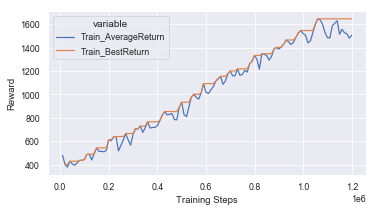

In [28]:
plt.figure(figsize=figsize)
ax = sns.lineplot(data=q1_longform, x='Train_EnvstepsSoFar', y='value', hue='variable')
ax.set(xlabel='Training Steps', ylabel='Reward')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig(os.path.join(export_dir, 'q1.pdf'), bbox_inches='tight')

In [5]:
def read_q2_data(batch):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if 'LunarLander-v3' in split and batch in split:
            config_list = split[split.index(batch)+1:split.index('LunarLander-v3')-1]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, 'Train_EnvstepsSoFar', 'Train_AverageReturn')
            idx = 'Train_EnvstepsSoFar'
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)
            
            if 'Config' in full_data and any(full_data['Config'] == config):
                full_data.loc[full_data['Config'] == config, 'Train_AverageReturn'] = full_data.loc[full_data['Config'] == config, 'Train_AverageReturn'].to_numpy() + \
                                                            data_dict['Train_AverageReturn']
            else:
                data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                     'Config': np.repeat(config, len(data_dict[idx])), 
                                     **data_dict})
                #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
                full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
    full_data.loc[:, 'Train_AverageReturn'] /= 3
    return full_data

full_q2_data = read_q2_data('q2')
full_q2_data

cs285\data\hw3_q2_doubledqn_1_LunarLander-v3_18-11-2020_18-36-22\events*
cs285\data\hw3_q2_doubledqn_2_LunarLander-v3_18-11-2020_18-36-30\events*
cs285\data\hw3_q2_doubledqn_3_LunarLander-v3_18-11-2020_18-36-46\events*
cs285\data\hw3_q2_dqn_1_LunarLander-v3_18-11-2020_17-28-23\events*
cs285\data\hw3_q2_dqn_2_LunarLander-v3_18-11-2020_17-28-35\events*
cs285\data\hw3_q2_dqn_3_LunarLander-v3_18-11-2020_17-28-48\events*


,Iteration,Config,Train_EnvstepsSoFar,Train_AverageReturn
0,0,doubledqn,1.0,NaN
1,1,doubledqn,10001.0,-231.438599
2,2,doubledqn,20001.0,-185.049667
3,3,doubledqn,30001.0,-166.225011
4,4,doubledqn,40001.0,-152.742844
...,...,...,...,...
95,45,dqn,450001.0,56.500299
96,46,dqn,460001.0,27.957027
97,47,dqn,470001.0,32.083708
98,48,dqn,480001.0,13.387133


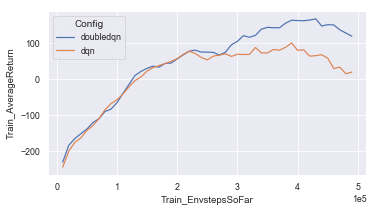

In [29]:
plt.figure(figsize=figsize)
sns.lineplot(data=full_q2_data, x='Train_EnvstepsSoFar', y='Train_AverageReturn', hue='Config')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig(os.path.join(export_dir, 'q2.pdf'), bbox_inches='tight')

In [40]:
def read_q3_data(batch):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if all([tag in split for tag in batch]):
            config_list = split[split.index('q3')+1:split.index('LunarLander-v3')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, 'Train_EnvstepsSoFar', 'Train_AverageReturn')
            idx = 'Train_EnvstepsSoFar'
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

full_q3_data = read_q3_data(['q3', 'LunarLander-v3'])
full_q3_data

cs285\data\hw3_q3_baseline_LunarLander-v3_18-11-2020_16-38-23\events*
cs285\data\hw3_q3_hparam1_LunarLander-v3_24-11-2020_22-43-32\events*
cs285\data\hw3_q3_hparam2_LunarLander-v3_24-11-2020_23-37-11\events*
cs285\data\hw3_q3_hparam3_LunarLander-v3_25-11-2020_00-11-53\events*


,Iteration,Config,Train_EnvstepsSoFar,Train_AverageReturn
0,0,baseline,1.0,NaN
1,1,baseline,10001.0,-225.661606
2,2,baseline,20001.0,-178.041214
3,3,baseline,30001.0,-153.711090
4,4,baseline,40001.0,-144.784027
...,...,...,...,...
191,45,hparam3,450001.0,122.382034
192,46,hparam3,460001.0,92.068977
193,47,hparam3,470001.0,64.352554
194,48,hparam3,480001.0,64.234764


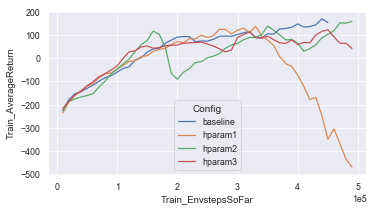

In [42]:
plt.figure(figsize=figsize)
sns.lineplot(data=full_q3_data, x='Train_EnvstepsSoFar', y='Train_AverageReturn', hue='Config')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig(os.path.join(export_dir, 'q3.pdf'), bbox_inches='tight')

In [11]:
def read_q4_data(batch):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if 'CartPole-v0' in split and batch in split:
            config_list = split[split.index(batch)+1:split.index('CartPole-v0')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, 'Train_EnvstepsSoFar', 'Eval_AverageReturn')
            idx = 'Train_EnvstepsSoFar'
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

full_q4_data = read_q4_data('q4')
full_q4_data

cs285\data\hw3_ q4_100_1_CartPole-v0_18-11-2020_21-43-14\events*
cs285\data\hw3_ q4_10_10_CartPole-v0_18-11-2020_21-44-07\events*
cs285\data\hw3_ q4_1_100_CartPole-v0_18-11-2020_21-43-42\events*
cs285\data\hw3_ q4_ac_1_1_CartPole-v0_18-11-2020_21-40-16\events*


,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn
0,0,100_1,1023.0,29.142857
1,1,100_1,11337.0,97.400002
2,2,100_1,21800.0,107.000000
3,3,100_1,32270.0,49.777779
4,4,100_1,42504.0,61.714287
5,5,100_1,52796.0,58.428570
6,6,100_1,63000.0,62.142857
7,7,100_1,73425.0,67.333336
8,8,100_1,83885.0,74.833336
9,9,100_1,94124.0,113.250000


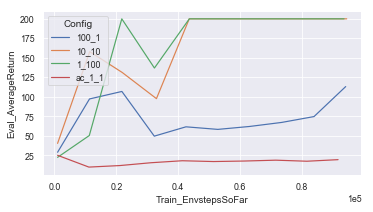

In [30]:
plt.figure(figsize=figsize)
sns.lineplot(data=full_q4_data, x='Train_EnvstepsSoFar', y='Eval_AverageReturn', hue='Config')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig(os.path.join(export_dir, 'q4.pdf'), bbox_inches='tight')

In [17]:
def inverted_pendulum_q5_data(batch):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if 'InvertedPendulum-v2' in split and batch in split:
            config_list = split[split.index(batch)+1:split.index('InvertedPendulum-v2')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, 'Train_EnvstepsSoFar', 'Eval_AverageReturn')
            idx = 'Train_EnvstepsSoFar'
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

inverted_pendulum_q5_data = inverted_pendulum_q5_data('q5')
inverted_pendulum_q5_data

cs285\data\hw3_ q5_1_100_InvertedPendulum-v2_24-11-2020_23-01-39\events*


,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn
0,0,1_100,5004.0,10.282051
1,1,1_100,55142.0,69.166664
2,2,1_100,105971.0,202.500000
3,3,1_100,156723.0,112.000000
4,4,1_100,207057.0,201.333328
5,5,1_100,257773.0,1000.000000
6,6,1_100,309284.0,1000.000000
7,7,1_100,361000.0,1000.000000
8,8,1_100,411096.0,1000.000000
9,9,1_100,461109.0,1000.000000


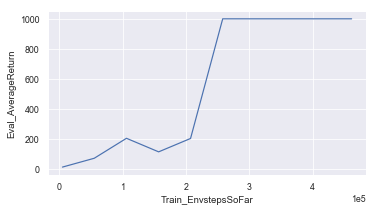

In [31]:
plt.figure(figsize=figsize)
sns.lineplot(data=inverted_pendulum_q5_data, x='Train_EnvstepsSoFar', y='Eval_AverageReturn')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig(os.path.join(export_dir, 'q5_inverted_pendulum.pdf'), bbox_inches='tight')

In [19]:
def half_cheetah_q5_data(batch):
    full_data = pd.DataFrame()

    for folder in os.listdir(data_dir):
        split = [s.strip() for s in folder.split('_')]
        # print(split)
        if 'HalfCheetah-v2' in split and batch in split:
            config_list = split[split.index(batch)+1:split.index('HalfCheetah-v2')]
            # print('_'.join(config))
            config = '_'.join(config_list)

            logdir = os.path.join(data_dir, folder, 'events*')
            print(logdir)
            eventfile = glob.glob(logdir)[0]

            data_dict = get_section_results(eventfile, 'Train_EnvstepsSoFar', 'Eval_AverageReturn')
            idx = 'Train_EnvstepsSoFar'
            for key in data_dict:
                while len(data_dict[key]) < len(data_dict[idx]):
                    data_dict[key] = np.insert(data_dict[key], 0, None)
            
            data = pd.DataFrame({'Iteration': range(len(data_dict[idx])), 
                                 'Config': np.repeat(config, len(data_dict[idx])), 
                                 **data_dict})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)

    return full_data

half_cheetah_q5_data = half_cheetah_q5_data('q5')
half_cheetah_q5_data

cs285\data\hw3_ q5_1_100_HalfCheetah-v2_24-11-2020_23-02-16\events*


,Iteration,Config,Train_EnvstepsSoFar,Eval_AverageReturn
0,0,1_100,30000.0,-97.920464
1,1,1_100,60000.0,-65.886765
2,2,1_100,90000.0,-55.084129
3,3,1_100,120000.0,-67.142517
4,4,1_100,150000.0,-51.341747
...,...,...,...,...
145,145,1_100,4380000.0,147.497360
146,146,1_100,4410000.0,137.514648
147,147,1_100,4440000.0,130.206619
148,148,1_100,4470000.0,138.071487


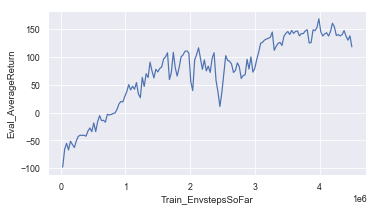

In [32]:
plt.figure(figsize=figsize)
sns.lineplot(data=half_cheetah_q5_data, x='Train_EnvstepsSoFar', y='Eval_AverageReturn')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig(os.path.join(export_dir, 'q5_half_cheetah.pdf'), bbox_inches='tight')